# ERH revision

In [1]:
import time
today = time.strftime('%Y-%m-%d')
name = 'Seungchan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by Seungchan Baek at 2020-08-04.


In [2]:
home = '/casa/bsc/projects/1_DCS/2004_paper_prep/'
%cd $home

/casa/bsc/projects/1_DCS/2004_paper_prep


In [4]:
from __future__ import division
import sys; sys.path.append('/casa/bsc/notebooks/')
from basic import gen_result_dir
resultpath = gen_result_dir('results/')
print 'resultpath:', resultpath

resultpath: results/200804/


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
%matplotlib inline

#### Import supplementary tables

In [6]:
s6 = pd.read_csv('supplementary/200619_s6_cleavage-patterns.csv', header=1, index_col=0)

In [7]:
single = set(s6[s6['Cleavage type']=='single'].index)
multi = set(s6[s6['Cleavage type']=='multiple'].index)
inverted = set(s6[s6['Cleavage type']=='inverted'].index)
nick5 = set(s6[s6['Cleavage type']=='nick5'].index)
nick3 = set(s6[s6['Cleavage type']=='nick3'].index)
nick = list(nick5) + list(nick3)
nonspec = set(s6[s6['Cleavage type']=='non-specific'].index)
dcsmirs = list(single) + list(multi)
nodcs = list(inverted) + list(nick) + list(nonspec)
print len(dcsmirs), len(nodcs)

512 1304


In [8]:
optimal = dcsmirs
subopti = nodcs
print len(optimal), len(subopti)

512 1304


### Clustered miRNAs

In [9]:
excel = pd.ExcelFile('supplementary/Kwon_2020_s1.xlsx')
cltbl = excel.parse('Merged', index_col=0, header=6)
print len(cltbl)

1881


In [10]:
clstdist = 2000
clustered = cltbl[cltbl['Distance (nt)'].apply(abs)<=clstdist].index
standalon = [ p for p in cltbl.index if p not in clustered ]
print len(clustered), len(standalon)

271 1610


### ERH KD

In [11]:
rcutoff = 800

In [12]:
erhtbl = pd.read_csv('resources/deseq_results_ERH.csv',index_col=0)
erhtbl = erhtbl[erhtbl['baseMean']>=rcutoff]
print len(erhtbl)

231


In [13]:
clst = [ p for p in erhtbl.index if p in clustered ]
solo = [ p for p in erhtbl.index if p in standalon ]

clstsub = [ p for p in clst if p in subopti ]
clstopt = [ p for p in clst if p in optimal ]
solosub = [ p for p in solo if p in subopti ]
soloopt = [ p for p in solo if p in optimal ]
print len(clstsub), len(clstopt), len(solosub), len(soloopt)

24 63 41 99


In [14]:
print max(erhtbl['log2FoldChange']), min(erhtbl['log2FoldChange'])

1.00036429468 -2.07663962767


In [26]:
colors = ['black','grey','tab:blue','tab:red']
labels = ['Nearest neighbor>2000 & optimal',
          'Nearest neighbor>2000 & suboptimal',
          'Nearest neighbor<=2000 & optimal',
          'Nearest neighbor<=2000 & suboptimal']
bins = np.linspace(-2,2,13)
pss = [ soloopt, solosub, clstopt, clstsub ]
xss, yss, lens, fcss = [], [], [], []
for ps in pss:
    vs, ts = np.histogram([erhtbl.loc[p,'log2FoldChange'] for p in ps],bins=bins)
    xss.append((ts[1:]+ts[:-1])/2)
    yss.append(vs.cumsum()/vs.sum())
    lens.append(len(ps))
    fcss.append([erhtbl.loc[p,'log2FoldChange'] for p in ps])

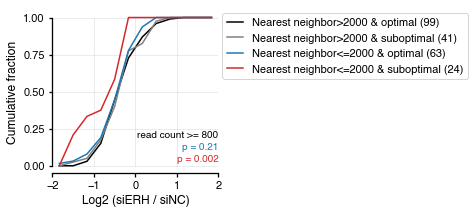

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for xs, ys, ln, label, color in zip(xss, yss, lens, labels, colors):
    ax.plot(xs, ys, color=color, lw=1.5, zorder=2, label='%s (%s)'%(label,ln))

ax.set_yticks([0,.25,.5,.75,1])
ax.set_xlabel('Log2 (siERH / siNC)', fontsize=12)
ax.set_ylabel('Cumulative fraction', fontsize=12)
ax.spines['left'].set_bounds(0,1)
ax.spines['bottom'].set_bounds(-2,2)
gr = plt.Rectangle((-3,-.01),5,1.01, color='w'); ax.add_patch(gr)
ax.grid(clip_path=gr, ls='-', lw=.5)
ax.legend(loc=(1.02,.58), handlelength=1.5, prop={'size':11})

pclstopt = mannwhitneyu(fcss[2], fcss[0]+fcss[1], alternative='less')[1]
pclstsub = mannwhitneyu(fcss[3], fcss[0]+fcss[1], alternative='less')[1]
ax.text(2, .19, 'read count >= %s'%rcutoff, ha='right')
ax.text(2, .11, 'p = %.2f'%pclstopt, color='tab:blue', ha='right')
ax.text(2, .03, 'p = %.3f'%pclstsub, color='tab:red', ha='right')
fig.savefig(resultpath + '200803_erh_rcut800.pdf')#,dpi=300)

### SAFB1/2 DKO

In [29]:
rcutoffr = 100
rcutoffh = 50

In [30]:
safbtblr = pd.read_csv('resources/deseq_results_SAFBKO_Ramos.csv',index_col=0)
safbtblr = safbtblr[safbtblr['baseMean']>=rcutoffr]
safbtblh = pd.read_csv('resources/deseq_results_SAFBKO_293T.csv',index_col=0)
safbtblh = safbtblh[safbtblh['baseMean']>=rcutoffh]
print len(safbtblr), len(safbtblh)

227 159


In [38]:
t = safbtblh
rcut = rcutoffh

In [39]:
print max(t['log2FoldChange']), min(t['log2FoldChange'])

2.23010821593 -2.16963824729


In [40]:
clst = [ p for p in t.index if p in clustered ]
solo = [ p for p in t.index if p in standalon ]

clstsub = [ p for p in clst if p in subopti ]
clstopt = [ p for p in clst if p in optimal ]
solosub = [ p for p in solo if p in subopti ]
soloopt = [ p for p in solo if p in optimal ]
print len(clstsub), len(clstopt), len(solosub), len(soloopt)

12 48 32 64


In [41]:
colors = ['black','grey','tab:blue','tab:red']
labels = ['Nearest neighbor>2000 & optimal',
          'Nearest neighbor>2000 & suboptimal',
          'Nearest neighbor<=2000 & optimal',
          'Nearest neighbor<=2000 & suboptimal']
bins = np.linspace(-3,3,19)
pss = [ soloopt, solosub, clstopt, clstsub ]
xss, yss, lens, fcss = [], [], [], []
for ps in pss:
    vs, ts = np.histogram([t.loc[p,'log2FoldChange'] for p in ps],bins=bins)
    xss.append((ts[1:]+ts[:-1])/2)
    yss.append(vs.cumsum()/vs.sum())
    lens.append(len(ps))
    fcss.append([t.loc[p,'log2FoldChange'] for p in ps])

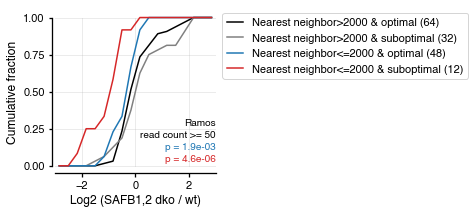

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for xs, ys, ln, label, color in zip(xss, yss, lens, labels, colors):
    ax.plot(xs, ys, color=color, lw=1.5, zorder=2, label='%s (%s)'%(label,ln))

ax.set_yticks([0,.25,.5,.75,1])
ax.set_xlabel('Log2 (SAFB1,2 dko / wt)', fontsize=12)
ax.set_ylabel('Cumulative fraction', fontsize=12)
ax.spines['left'].set_bounds(0,1)
ax.spines['bottom'].set_bounds(-3,3)
gr = plt.Rectangle((-3,-.01),6,1.01, color='w'); ax.add_patch(gr)
ax.grid(clip_path=gr, ls='-', lw=.5)
ax.legend(loc=(1.02,.58), handlelength=1.5, prop={'size':11})

pclstopt = mannwhitneyu(fcss[2], fcss[0]+fcss[1], alternative='less')[1]
pclstsub = mannwhitneyu(fcss[3], fcss[0]+fcss[1], alternative='less')[1]
ax.text(3, .27, 'Ramos', ha='right')
ax.text(3, .19, 'read count >= %s'%rcut, ha='right')
ax.text(3, .11, 'p = %.1e'%pclstopt, color='tab:blue', ha='right')
ax.text(3, .03, 'p = %.1e'%pclstsub, color='tab:red', ha='right')
fig.savefig(resultpath + '200803_safb12_293t.pdf')#,dpi=300)

### DGCR8 del ex2

In [70]:
rcutoff = 100

In [71]:
dgtbl = pd.read_csv('resources/deseq_results_DGCR8_ex2.csv',index_col=0)
dgtbl = dgtbl[dgtbl['baseMean']>=rcutoff]
print len(dgtbl)

234


In [72]:
clst = [ p for p in dgtbl.index if p in clustered ]
solo = [ p for p in dgtbl.index if p in standalon ]

clstsub = [ p for p in clst if p in subopti ]
clstopt = [ p for p in clst if p in optimal ]
solosub = [ p for p in solo if p in subopti ]
soloopt = [ p for p in solo if p in optimal ]
print len(clstsub), len(clstopt), len(solosub), len(soloopt)

26 67 43 95


In [73]:
print max(dgtbl['log2FoldChange']), min(dgtbl['log2FoldChange'])

2.38121768311 -6.51889542637


In [74]:
colors = ['black','grey','tab:blue','tab:red']
labels = ['Nearest neighbor>2000 & optimal',
          'Nearest neighbor>2000 & suboptimal',
          'Nearest neighbor<=2000 & optimal',
          'Nearest neighbor<=2000 & suboptimal']
bins = np.linspace(-7,7,100)
pss = [ soloopt, solosub, clstopt, clstsub ]
xss, yss, lens, fcss = [], [], [], []
for ps in pss:
    vs, ts = np.histogram([dgtbl.loc[p,'log2FoldChange'] for p in ps],bins=bins)
    xss.append((ts[1:]+ts[:-1])/2)
    yss.append(vs.cumsum()/vs.sum())
    lens.append(len(ps))
    fcss.append([dgtbl.loc[p,'log2FoldChange'] for p in ps])

Text(8,0.03,u'p = 8.9e-05')

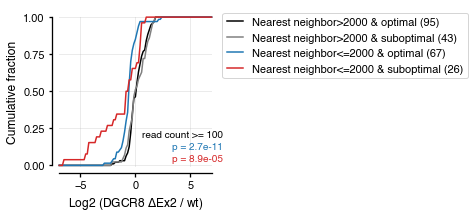

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for xs, ys, ln, label, color in zip(xss, yss, lens, labels, colors):
    ax.plot(xs, ys, color=color, lw=1.5, zorder=2, label='%s (%s)'%(label,ln))

ax.set_yticks([0,.25,.5,.75,1])
ax.set_xlabel('Log2 (DGCR8 $\Delta$Ex2 / wt)', fontsize=12)
ax.set_ylabel('Cumulative fraction', fontsize=12)
ax.spines['left'].set_bounds(0,1)
ax.spines['bottom'].set_bounds(-7,7)
gr = plt.Rectangle((-7,-.01),14,1.01, color='w'); ax.add_patch(gr)
ax.grid(clip_path=gr, ls='-', lw=.5)
ax.legend(loc=(1.02,.58), handlelength=1.5, prop={'size':11})

pclstopt = mannwhitneyu(fcss[2], fcss[0]+fcss[1], alternative='less')[1]
pclstsub = mannwhitneyu(fcss[3], fcss[0]+fcss[1], alternative='less')[1]
ax.text(8, .19, 'read count >= %s'%rcutoff, ha='right')
ax.text(8, .11, 'p = %.1e'%pclstopt, color='tab:blue', ha='right')
ax.text(8, .03, 'p = %.1e'%pclstsub, color='tab:red', ha='right')
#fig.savefig(resultpath + '200803_dgcr8_delEx2.pdf')#,dpi=300)